features:
dining table, toilet, bed, chair, tv, microwave, oven, laptop, couch, 

labels:
kitchen, bedroom, living room, schoolroom, bathroom

In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sn

import pickle


/Users/maxkucher/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:

# labels:
# kitchen, bedroom, living room, schoolroom, bathroom

data_1 = pd.DataFrame({
    "table": [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    "toilet": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "bed": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "chair": [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], 
    "tv": [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
    "microwave": [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
    "oven": [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    "laptop": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "couch": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "place": ["kitchen", "kitchen", "kitchen", "kitchen", "kitchen", "kitchen", "kitchen", "kitchen", "kitchen",  "kitchen", "kitchen", "kitchen",  "kitchen", "kitchen", "kitchen",  "kitchen", "kitchen", "kitchen"]
})

data_1

,table,toilet,bed,chair,tv,microwave,oven,laptop,couch,place
0,1,0,0,1,0,1,1,0,0,kitchen
1,1,0,0,1,1,1,1,0,0,kitchen
2,0,0,0,1,1,1,1,0,0,kitchen
3,1,0,0,1,0,0,1,0,0,kitchen
4,0,0,0,1,1,1,0,0,0,kitchen
5,1,0,0,1,0,0,1,0,0,kitchen
6,1,0,0,0,1,0,1,0,0,kitchen
7,1,0,0,0,1,0,1,0,0,kitchen
8,1,0,0,0,0,0,1,0,0,kitchen
9,0,0,0,1,0,1,1,0,0,kitchen


In [3]:
data_2 = pd.DataFrame({
    "table": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "toilet": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "bed": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "chair": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    "tv": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "microwave": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "oven": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "laptop": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "couch": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "place": ["bathroom", "bathroom", "bathroom", "bathroom", "bathroom", "bathroom", "bathroom", "bathroom", "bathroom", "bathroom", "bathroom", "bathroom"]
})

data_2

,table,toilet,bed,chair,tv,microwave,oven,laptop,couch,place
0,0,1,0,0,0,0,0,0,0,bathroom
1,0,1,0,0,0,0,0,0,0,bathroom
2,0,1,0,0,0,0,0,0,0,bathroom
3,0,1,0,0,0,0,0,0,0,bathroom
4,0,1,0,0,0,0,0,0,0,bathroom
5,0,1,0,0,0,0,0,0,0,bathroom
6,0,1,0,0,0,0,0,0,0,bathroom
7,0,1,0,0,0,0,0,0,0,bathroom
8,0,1,0,0,0,0,0,0,0,bathroom
9,0,1,0,0,0,0,0,0,0,bathroom


In [4]:
data_3 = pd.DataFrame({
    "table": [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
    "toilet": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "bed": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "chair": [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0], 
    "tv": [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    "microwave": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "oven": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "laptop": [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
    "couch": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "place": ["bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom",  "bedroom", "bedroom", "bedroom",  "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom", "bedroom"]
})


data_3


,table,toilet,bed,chair,tv,microwave,oven,laptop,couch,place
0,1,0,1,1,1,0,0,0,0,bedroom
1,0,0,1,0,0,0,0,0,0,bedroom
2,0,0,1,1,1,0,0,0,0,bedroom
3,0,0,1,0,1,0,0,0,0,bedroom
4,1,0,1,1,1,0,0,0,0,bedroom
5,0,0,1,0,0,0,0,0,0,bedroom
6,1,0,1,1,1,0,0,0,0,bedroom
7,1,0,1,1,0,0,0,0,0,bedroom
8,1,0,1,0,1,0,0,0,0,bedroom
9,0,0,1,1,0,0,0,1,0,bedroom


In [5]:
data_4 = pd.DataFrame({
    "table": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    "toilet": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "bed": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "chair": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 
    "tv": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "microwave": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "oven": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "laptop": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "couch": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "place": ['living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room', 'living room']
})

data_4


,table,toilet,bed,chair,tv,microwave,oven,laptop,couch,place
0,1,0,0,1,1,0,0,0,1,living room
1,0,0,0,1,1,0,0,0,1,living room
2,1,0,0,1,1,0,0,0,1,living room
3,0,0,0,1,1,0,0,0,1,living room
4,1,0,0,1,1,0,0,0,1,living room
5,0,0,0,1,1,0,0,0,1,living room
6,1,0,0,1,1,0,0,0,1,living room
7,0,0,0,1,1,0,0,0,1,living room
8,1,0,0,1,1,0,0,0,1,living room
9,0,0,0,1,1,0,0,0,1,living room


In [6]:
data_5 = pd.DataFrame({
    "table": [1, 1, 1, 1, 1, 1, 0, 1],
    "toilet": [0, 0, 0, 0, 0, 0, 0, 0],
    "bed": [0, 0, 0, 0, 0, 0, 0, 0],
    "chair": [1, 1, 0, 0, 0, 0, 1, 1], 
    "tv": [1, 0, 0, 1, 1, 0, 1, 0],
    "microwave": [0, 0, 0, 0, 0, 0, 0, 0],
    "oven": [0, 0, 0, 0, 0, 0, 0, 0],
    "laptop": [0, 0, 1, 0, 1, 1, 0, 1],
    "couch": [0, 0, 0, 0, 0, 0, 0, 0],
    "place": ["schoolroom", "schoolroom", "schoolroom", "schoolroom", "schoolroom", "schoolroom", "schoolroom", "schoolroom"]
})

data_5

,table,toilet,bed,chair,tv,microwave,oven,laptop,couch,place
0,1,0,0,1,1,0,0,0,0,schoolroom
1,1,0,0,1,0,0,0,0,0,schoolroom
2,1,0,0,0,0,0,0,1,0,schoolroom
3,1,0,0,0,1,0,0,0,0,schoolroom
4,1,0,0,0,1,0,0,1,0,schoolroom
5,1,0,0,0,0,0,0,1,0,schoolroom
6,0,0,0,1,1,0,0,0,0,schoolroom
7,1,0,0,1,0,0,0,1,0,schoolroom


In [7]:
data = pd.concat([data_1, data_2, data_3, data_4, data_5])


In [8]:
for i in range(4):
    data = pd.concat([data, data])

In [9]:
data

,table,toilet,bed,chair,tv,microwave,oven,laptop,couch,place
0,1,0,0,1,0,1,1,0,0,kitchen
1,1,0,0,1,1,1,1,0,0,kitchen
2,0,0,0,1,1,1,1,0,0,kitchen
3,1,0,0,1,0,0,1,0,0,kitchen
4,0,0,0,1,1,1,0,0,0,kitchen
...,...,...,...,...,...,...,...,...,...,...
3,1,0,0,0,1,0,0,0,0,schoolroom
4,1,0,0,0,1,0,0,1,0,schoolroom
5,1,0,0,0,0,0,0,1,0,schoolroom
6,0,0,0,1,1,0,0,0,0,schoolroom


In [10]:
data.replace({"place": {"kitchen": 0, "bedroom": 1, "living room": 2, "bathroom": 3, "schoolroom": 4}}, inplace=True)

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_78501/1758869489.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"place": {"kitchen": 0, "bedroom": 1, "living room": 2, "bathroom": 3, "schoolroom": 4}}, inplace=True)


In [11]:
data

,table,toilet,bed,chair,tv,microwave,oven,laptop,couch,place
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,1,1,1,0,0,0
2,0,0,0,1,1,1,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0
4,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3,1,0,0,0,1,0,0,0,0,4
4,1,0,0,0,1,0,0,1,0,4
5,1,0,0,0,0,0,0,1,0,4
6,0,0,0,1,1,0,0,0,0,4


In [12]:
temp_data = data.drop("place", axis="columns").isnull()
# temp_data

for i in temp_data.index: 
    for column in temp_data.columns:
        if temp_data.loc[i, column].any() == True:
            print([i, column])

In [13]:
x = data.drop("place", axis="columns")
y = data["place"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
x_train.shape

(1254, 9)

In [16]:


model = Sequential([
    Dense(7, input_shape = (9, ), activation="relu"),
    Dense(4, activation="relu"),
    Dense(6, activation="relu"),
    Dense(4, activation="relu"),
    Dense(8, activation="relu"),
    Dense(5, activation="softmax")
   
])


model.compile(
    optimizer = "SGD",
    loss = "sparse_categorical_crossentropy",
    metrics = (["accuracy"])
    )




In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 70        
                                                                 
 dense_1 (Dense)             (None, 4)                 32        
                                                                 
 dense_2 (Dense)             (None, 6)                 30        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (9

In [18]:
# history = model.fit(x_train, y_train, epochs=90, verbose=0)

# losses = history.history["loss"]
# epochs = range(1, len(losses)+1)

# plt.plot(epochs, losses, "r", label = "Losses")
# plt.title("Loss/Epochs corelation")
# plt.xlabel('Epochs')
# plt.ylabel('Losses')
# plt.legend()
# plt.show()

In [19]:
model.fit(x_train, y_train, epochs=150)

Epoch 1/150
40/40 [==============================] - 0s 1ms/step - loss: 1.5781 - accuracy: 0.2982
Epoch 2/150
40/40 [==============================] - 0s 2ms/step - loss: 1.5439 - accuracy: 0.4003
Epoch 3/150
40/40 [==============================] - 0s 1ms/step - loss: 1.5123 - accuracy: 0.4434
Epoch 4/150
40/40 [==============================] - 0s 826us/step - loss: 1.4765 - accuracy: 0.4402
Epoch 5/150
40/40 [==============================] - 0s 1ms/step - loss: 1.4388 - accuracy: 0.4514
Epoch 6/150
40/40 [==============================] - 0s 820us/step - loss: 1.3970 - accuracy: 0.4737
Epoch 7/150
40/40 [==============================] - 0s 802us/step - loss: 1.3516 - accuracy: 0.4825
Epoch 8/150
40/40 [==============================] - 0s 1ms/step - loss: 1.3098 - accuracy: 0.4825
Epoch 9/150
40/40 [==============================] - 0s 2ms/step - loss: 1.2707 - accuracy: 0.4825
Epoch 10/150
40/40 [==============================] - 0s 1ms/step - loss: 1.2353 - accuracy: 0.4833
Epo

In [20]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9873


[0.020538942888379097, 0.987261176109314]

In [21]:
res = np.argmax(model.predict([[0, 1, 1, 0, 1, 1, 0, 0, 1]]))

pred_list = ["kitchen", "bedroom", "living room", "bathroom", "schoolroom"]

pred_list[res]

1/1 [==============================] - 0s 75ms/step


'schoolroom'

In [22]:

res_list = []
results = model.predict(x_test)
for res in results:
    res = np.argmax(res)
    res_list.append(res)

res_list = np.array(res_list)
res_list



res_dataframe = pd.DataFrame({"Reals": y_test.squeeze(), "Predicted": res_list.squeeze()})

res_dataframe.columns = ["Reals", "Predicted"]
res_dataframe

10/10 [==============================] - 0s 885us/step


,Reals,Predicted
0,2,2
16,0,0
3,2,2
8,2,2
4,1,1
...,...,...
3,3,3
18,1,1
23,2,2
22,2,2


In [23]:
cm = confusion_matrix(y_test, res_list)
cm

array([[ 55,   0,   0,   0,   4],
       [  0,  81,   0,   0,   0],
       [  0,   0, 104,   0,   0],
       [  0,   0,   0,  41,   0],
       [  0,   0,   0,   0,  29]])

Text(95.72222222222221, 0.5, 'Actual')

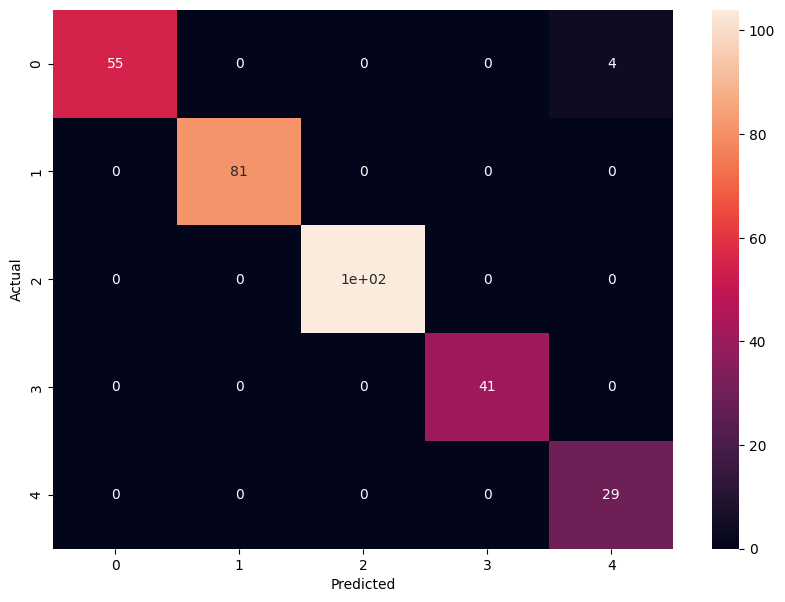

In [24]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [25]:
with open("room_NN.pickle", "wb") as file:
    pickle.dump(model, file)